Import `scikit-learn` estimators, plotting utils and `dbsod`

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import OneClassSVM
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from dbsod import dbsod

Load data and compute oulierness scores

In [2]:
X = load_wine()["data"][:, [1, 2]]  # two clusters

outlierness_scores = dbsod(
    X=MinMaxScaler().fit_transform(X),  # normalize data before computing scores
    eps_space=np.linspace(0., 0.1, 100),
    min_pts=3,
    metric='euclidean',
)

Computing pairwise distances:                  [====================] 100% (0 it/s)           
Identifying outliers for each `epsilon` value: [====================] 100% (99000 it/s)           


Fit `scikit-klearn` estimators

In [3]:
%matplotlib agg

estimators = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]

# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(X)
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))
boundary_legend = ax.legend(handles=legend_lines, loc="upper center")

Visualize result

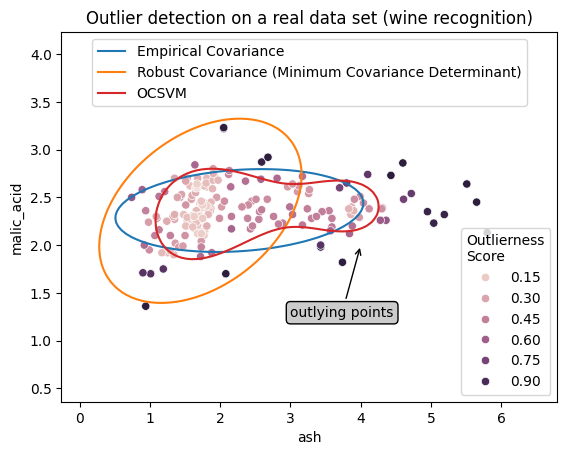

In [4]:
%matplotlib inline

# plot scatter
scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=outlierness_scores)
scatter_legend = ax.legend(title="Outlierness\nScore")
ax.add_artist(boundary_legend)

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
_ = ax.set(
    xlabel="ash",
    ylabel="malic_acid",
    title="Outlier detection on a real data set (wine recognition)",
)

plt.savefig('figures/01-real-data.png')
plt.show()

_Note: This example is an adapted version of a [scikit-learn real world outlier detection example](https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html) with applied `DBSOD` to the data points (visualized outlierness score)._